In [ ]:
!pip install prov[dot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421 kB 13.5 MB/s 
     |████████████████████████████████| 500 kB 46.2 MB/s 
     |████████████████████████████████| 41 kB 629 kB/s 


In [ ]:
import prov.model as prov
from prov.model import ProvDocument
d1 = ProvDocument()  # d1 is now an empty provenance document

In [ ]:
from prov.model import ProvDocument

In [ ]:
d1 = ProvDocument()  # d1 is now an empty provenance document

In [ ]:
# Declaring namespaces for various prefixes 
d1.add_namespace('prov', 'http://www.w3.org/ns/prov#')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('base', 'http://www.RDorg.it/')
d1.add_namespace('user', 'http://www.RDorg.it/people/')
d1.add_namespace('user_roles','http://www.RDorg.it/roles/')


<Namespace: user_roles {http://www.RDorg.it/roles/}>

In [ ]:
#Declaring entities
e1 = d1.entity ('base:Sample')
e2 = d1.entity ('base:Processed_sample')
e3 = d1.entity ('base:Libraries')
e4 = d1.entity ('base:BCL_raw_data')
e6 = d1.entity ('base:FASTQ_files')
e8 = d1.entity ('base:Secondary_sequencing_analysis_results')
e9 = d1.entity ('base:Tertiary_sequencing_analysis_results')
#Protocols described as entity type "plan"
e10 = d1.entity ('base:Extraction_protocol', {'prov:type':'Plan'})
e11 = d1.entity ('base:Library_preaparation_protocol', {'prov:type':'Plan'})
#The raw data and FASTQ storages as collection
e12 = d1.entity ('base:Raw_data_database', {'prov:type':'Collection'})
e13 = d1.entity ('base:FASTQ_database', {'prov:type':'Collection'})
d1.hadMember (e12, e4)
d1.hadMember (e13, e6)

<ProvMembership: (base:FASTQ_database, base:FASTQ_files)>

In [ ]:
#Declaring agents
ag1 = d1.agent ('base:Research_Center', {'prov:type':'Organization', 'foaf:name':"CRS4"}) 
ag2 = d1.agent ('user:Service_requesting_user', {'prov:type':'Organization'})

In [ ]:
#Declaring activities
a1 = d1.activity ('base:Sample_processing')
a2 = d1.activity ('base:Libraries_preparation')
a3 = d1.activity ('base:Sequencing')
a4 = d1.activity ('base:BCL_storage')
a5 = d1.activity ('base:Primary_analysis')
a6 = d1.activity ('base:FASTQ_storage')
a7 = d1.activity ('base:Secondary_analysis')
a8 = d1.activity ('base:Tertiary_analysis')

In [ ]:
#Declaring usage
d1.used (a1, e1)
d1.used (a1, e10)
d1.used (a2, e2)
d1.used (a2, e11)
d1.used (a3, e3)
d1.used (a4, e4)
d1.used (a5, e4)
d1.used (a6, e6)
d1.used (a7, e6)
d1.used (a8, e8)

<ProvUsage: (base:Tertiary_analysis, base:Secondary_sequencing_analysis_results)>

In [ ]:
#Declaring generation
d1.wasGeneratedBy (e2, a1)
d1.wasGeneratedBy (e3, a2)
d1.wasGeneratedBy (e4, a3)
d1.wasGeneratedBy (e6, a5)
d1.wasGeneratedBy (e8, a7)
d1.wasGeneratedBy (e9, a8)
d1.wasGeneratedBy (e12, a4)
d1.wasGeneratedBy (e13, a6)

<ProvGeneration: (base:FASTQ_database, base:FASTQ_storage)>

In [ ]:
#Declaring Attribution (Linking Entities to Agents)
d1.wasAttributedTo (e1, ag2)
d1.wasAttributedTo (e2, ag1)
d1.wasAttributedTo (e3, ag1)
d1.wasAttributedTo (e4, ag1)
d1.wasAttributedTo (e6, ag1)
d1.wasAttributedTo (e8, ag1)
d1.wasAttributedTo (e9, ag1)
d1.wasAttributedTo (e12, ag1)
d1.wasAttributedTo (e13, ag1)


<ProvAttribution: (base:FASTQ_database, base:Research_Center)>

In [ ]:
#Declaring association (Linking Agents to Activities)
d1.wasAssociatedWith (a1, ag1)
d1.wasAssociatedWith (a2, ag1)
d1.wasAssociatedWith (a3, ag1)
d1.wasAssociatedWith (a4, ag1)
d1.wasAssociatedWith (a5, ag1)
d1.wasAssociatedWith (a6, ag1)
d1.wasAssociatedWith (a7, ag1)
d1.wasAssociatedWith (a8, ag1)

<ProvAssociation: (base:Tertiary_analysis, base:Research_Center)>

In [ ]:
#Declaring derivation (Further Entities description)
d1.wasDerivedFrom (e2, e1)
d1.wasDerivedFrom (e3, e2)
d1.wasDerivedFrom (e6, e4)
d1.wasDerivedFrom (e8, e6)
d1.wasDerivedFrom (e9, e8)

<ProvDerivation: (base:Tertiary_sequencing_analysis_results, base:Secondary_sequencing_analysis_results)>

In [ ]:
#Further Agents description (Delegation)
d1.actedOnBehalfOf (ag1, ag2)

<ProvDelegation: (base:Research_Center, user:Service_requesting_user)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('SimplifiedNGSprovenance-refined.png')

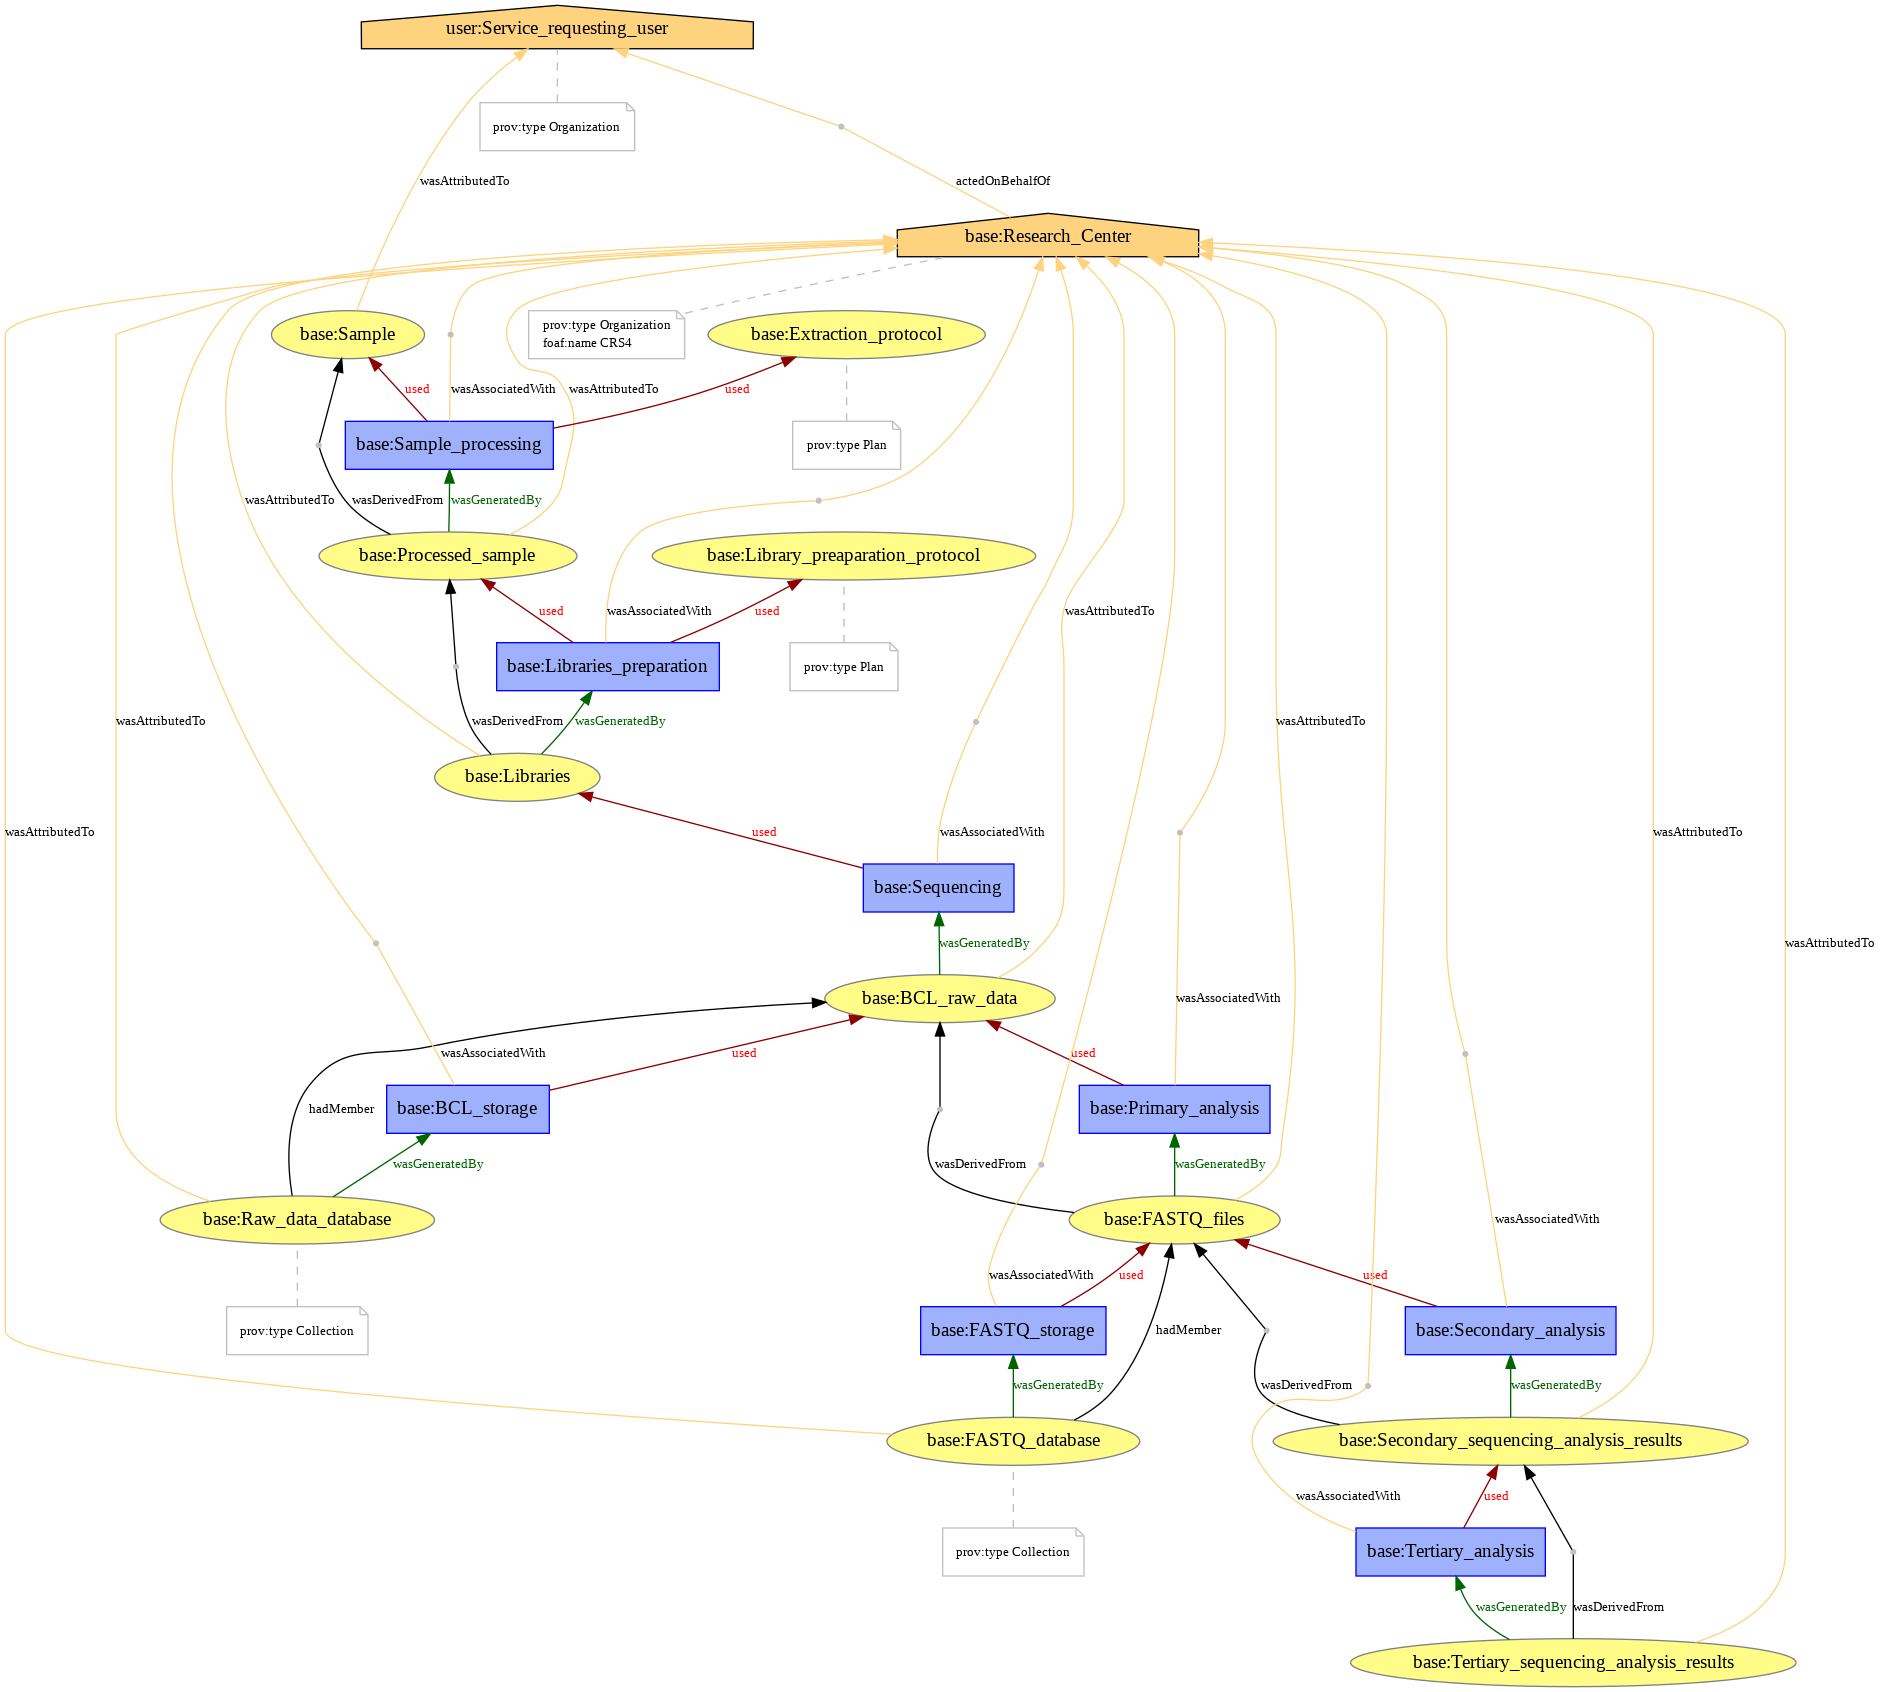

In [ ]:
# visualize the image
from IPython.display import Image 
Image('SimplifiedNGSprovenance-refined.png')

In [ ]:
print(d1.get_provn())

document
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix base <http://www.RDorg.it/>
  prefix user <http://www.RDorg.it/people/>
  prefix user_roles <http://www.RDorg.it/roles/>
  
  entity(base:Sample)
  entity(base:Processed_sample)
  entity(base:Libraries)
  entity(base:BCL_raw_data)
  entity(base:FASTQ_files)
  entity(base:Secondary_sequencing_analysis_results)
  entity(base:Tertiary_sequencing_analysis_results)
  entity(base:Extraction_protocol, [prov:type="Plan"])
  entity(base:Library_preaparation_protocol, [prov:type="Plan"])
  entity(base:Raw_data_database, [prov:type="Collection"])
  entity(base:FASTQ_database, [prov:type="Collection"])
  hadMember(base:Raw_data_database, base:BCL_raw_data)
  hadMember(base:FASTQ_database, base:FASTQ_files)
  agent(base:Research_Center, [prov:type="Organization", foaf:name="CRS4"])
  agent(user:Service_requesting_user, [prov:type="Organization"])
  activity(base:Sample_processing, -, -)
  activity(base:Libraries_preparation, -, -)
  activ

In [ ]:
#Turtle (PROV-O)
d1.serialize('SimplifiedNGSprovenance-refined.ttl', format='rdf', rdf_format='ttl')

In [ ]:
#XML (PROV-XML)
d1.serialize('SimplifiedNGSprovenance-refined.xml', format='xml')